Production d'un aliment par pays.

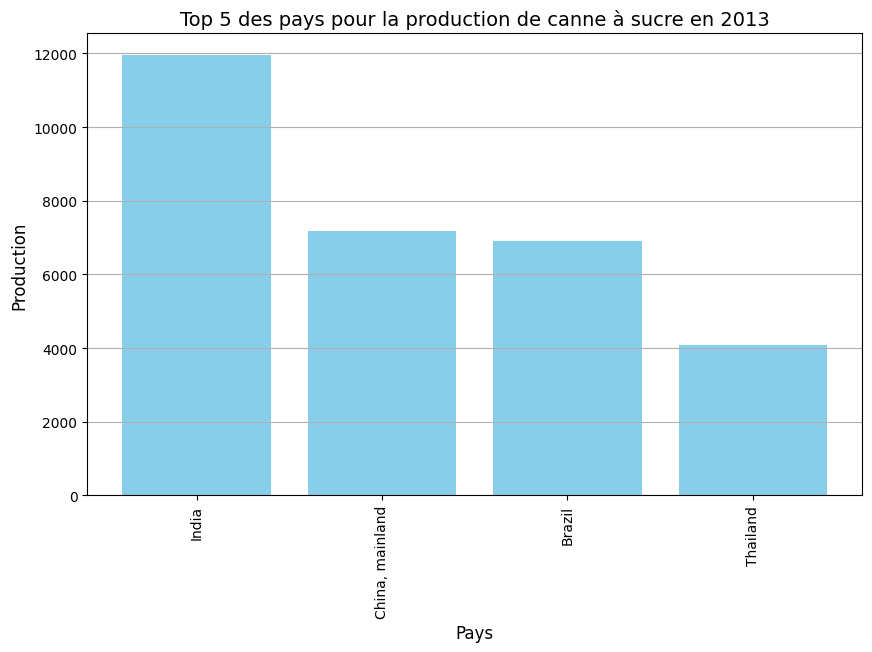

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px

# Lire le csv 
df = pd.read_csv("FAO.csv", encoding='ISO-8859-1')

# Supprimer les valeurs manquantes et les doublons
df = df.dropna()
df = df.drop_duplicates()

# Remplacer 'Feed' par 'Food' dans la colonne 'Element'

# Filtrer les données pour l'année 2013
df_2013 = df[['Area', 'Item', 'Y2013']]

# Filtrer les données pour 'Sugar cane'
df_sugar_cane = df_2013[df_2013['Item'] == 'Sugar cane']

# Trier le DataFrame par la colonne 'Y2013' en ordre décroissant
df_sugar_cane_sorted = df_sugar_cane.sort_values('Y2013', ascending=False)

# Sélectionner les 5 premières lignes
df_sugar_cane_top5 = df_sugar_cane_sorted.head(5)

# Créer un graphique à barres
plt.figure(figsize=(10,6))
plt.bar(df_sugar_cane_top5['Area'], df_sugar_cane_top5['Y2013'], color='skyblue')
plt.title('Top 5 des pays pour la production de canne à sucre en 2013', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Créer un graphique de dispersion géographique
fig = px.scatter_geo(df.loc[df['Item'] == 'Sugar cane'], lat = 'latitude', lon = 'longitude', size = 'Y2013')
fig.update_layout(
    title_text = 'Répartition mondiale de la production de canne à sucre en 2013',
    geo=dict(
        showframe = False,
        showcoastlines = True,
        coastlinecolor="Black",
        showland=True, 
        landcolor="green",
        showocean=True, 
        oceancolor="Azure",
        projection_type = "natural earth"
    )
)
fig.show()


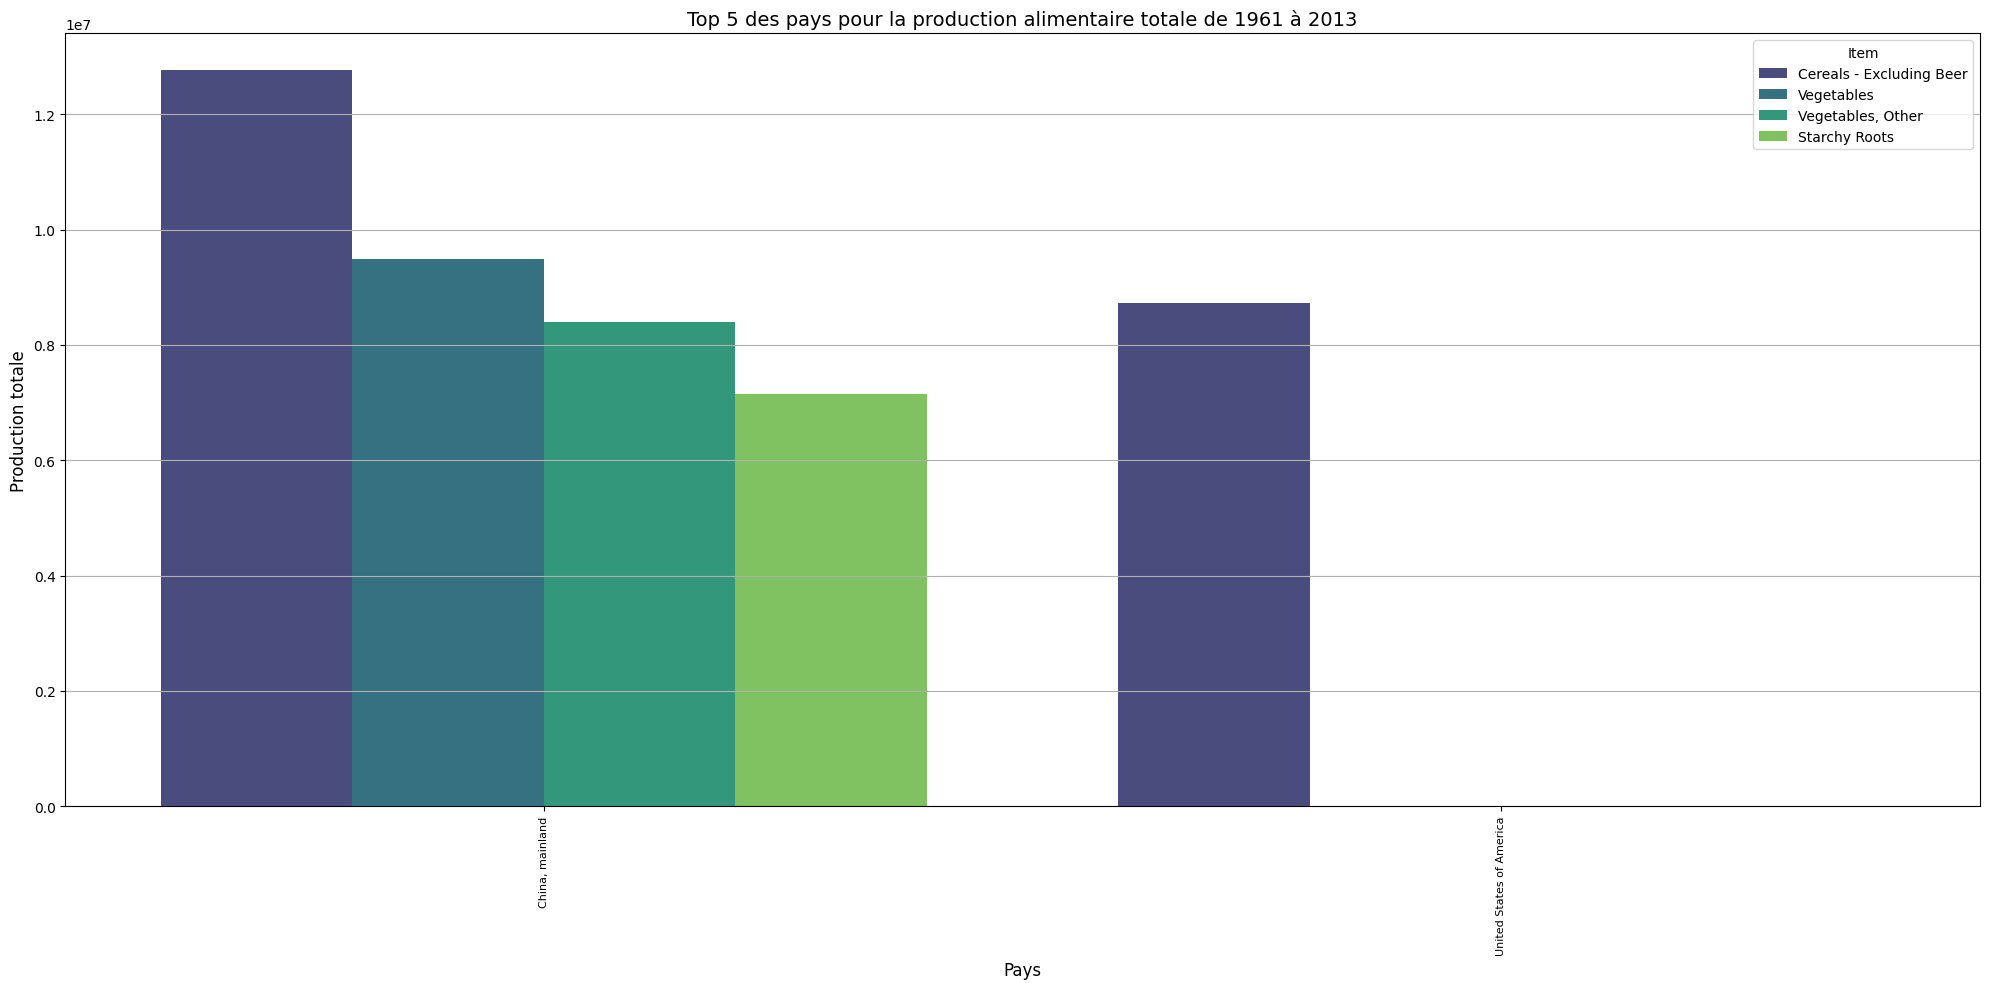

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

# Lire le csv 
df = pd.read_csv("FAO.csv", encoding='ISO-8859-1')

# Supprimer les valeurs manquantes et les doublons
df = df.dropna()
df = df.drop_duplicates()

# Ajouter une colonne qui combine la production de toutes les années de 1961 à 2013
years = ['Y'+str(year) for year in range(1961, 2014)]
df['Total'] = df[years].sum(axis=1)

# Créer un DataFrame qui contient la production totale pour chaque pays et chaque item
df_total = df.groupby(['Area', 'Item'])['Total'].sum().reset_index()

# Trier le DataFrame par la colonne 'Total' en ordre décroissant
df_total_sorted = df_total.sort_values('Total', ascending=False)

# Sélectionner les 5 premières lignes
df_top5 = df_total_sorted.head(5)

# Créer un graphique à barres
plt.figure(figsize=(20,10))  
sns.barplot(x='Area', y='Total', hue='Item', data=df_top5, palette='viridis')
plt.title('Top 5 des pays pour la production alimentaire totale de 1961 à 2013', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Production totale', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

# Créer un DataFrame qui contient la production totale pour chaque pays, chaque item et leurs coordonnées géographiques
df_total_geo = df.groupby(['Area', 'Item', 'latitude', 'longitude'])['Total'].sum().reset_index()

# Créer un graphique de dispersion géographique
fig = px.scatter_geo(df_total_geo, lat='latitude', lon='longitude', color='Item', size='Total', 
                     title='Répartition mondiale de la production alimentaire totale de 1961 à 2013')
fig.update_layout(
    geo=dict(
        showframe = False,
        showcoastlines = True,
        coastlinecolor="Black",
        showland=True, 
        landcolor="green",
        showocean=True, 
        oceancolor="Azure",
        projection_type = "natural earth"
    )
)
fig.show()


